<a href="https://colab.research.google.com/github/AditiDeo20/Rice_Leaf_Disease_Detection_Using_CNN/blob/main/Rice_Leaf_Disease_Full_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Rice Leaf Disease Detection using CNN

## Objective:
Classify rice leaf diseases into:
- Brown Spot
- Leaf Smut
- Bacterial Leaf Blight

This notebook is Colab-ready and uses Google Drive for data storage.


In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:

!pip install split-folders


In [14]:

import splitfolders
import os

# Set dataset path (CHANGE if needed)
dataset_path = "/content/drive/MyDrive/Colab Notebooks/RiceLeafDiseaseDataset"
output_path = "/content/drive/MyDrive/Colab Notebooks/Rice_Leaf_Disease_Data_Split"

# Perform split (train/val/test 70/15/15)
splitfolders.ratio(dataset_path, output=output_path, seed=1337, ratio=(0.7, 0.15, 0.15))

print("Dataset successfully split!")


Copying files: 119 files [00:01, 66.28 files/s]

Dataset successfully split!


In [16]:

train_dir = output_path + "/train"
val_dir = output_path + "/val"
test_dir = output_path + "/test"

print("Train Classes:", os.listdir(train_dir))
print("Validation Classes:", os.listdir(val_dir))
print("Test Classes:", os.listdir(test_dir))


Train Classes: ['Leaf smut', 'Bacterial leaf blight', 'Brown spot']
Validation Classes: ['Leaf smut', 'Bacterial leaf blight', 'Brown spot']
Test Classes: ['Leaf smut', 'Bacterial leaf blight', 'Brown spot']


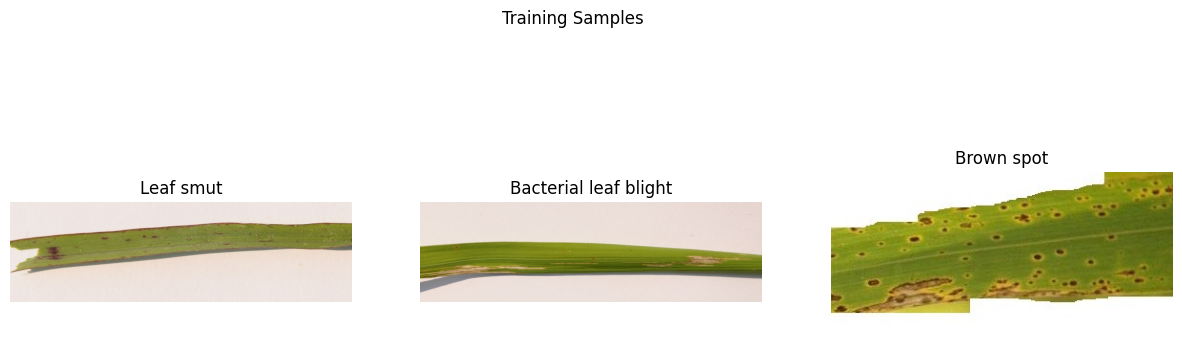

In [17]:

import matplotlib.pyplot as plt
import cv2
import random

def visualize_samples(folder_path, title):
    categories = os.listdir(folder_path)
    plt.figure(figsize=(15,5))
    for idx, category in enumerate(categories):
        img_name = random.choice(os.listdir(os.path.join(folder_path, category)))
        img_path = os.path.join(folder_path, category, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, len(categories), idx+1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

visualize_samples(train_dir, "Training Samples")



## Model Building

You can now add your CNN model below. Typical steps:
1. Define model (Keras / TensorFlow)
2. Compile model
3. Fit model on `train_dir`
4. Evaluate on `val_dir` and `test_dir`


In [18]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [25]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [19]:

# ImageDataGenerator for train, val, test
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

img_size = (128, 128)
batch_size = 32

train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')


Found 95 images belonging to 3 classes.
Found 36 images belonging to 3 classes.
Found 19 images belonging to 3 classes.


In [20]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3749 - loss: 1.1180 - val_accuracy: 0.2778 - val_loss: 1.1009
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3245 - loss: 1.1013 - val_accuracy: 0.3333 - val_loss: 1.1010
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3782 - loss: 1.1223 - val_accuracy: 0.4167 - val_loss: 1.0938
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3613 - loss: 1.0737 - val_accuracy: 0.3333 - val_loss: 1.0922
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.3995 - loss: 1.0661 - val_accuracy: 0.3889 - val_loss: 1.0904
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4174 - loss: 1.0878 - val_accuracy: 0.3889 - val_loss: 1.0875
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3969 - loss: 1.0655 - val_accuracy: 0.4444 - val_loss: 1.0820
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4648 - loss: 1.0598 - val_accuracy: 0.4444 - val_loss: 1.0776
Epoch 9/50
3/3 ━

In [22]:

loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step - accuracy: 0.6316 - loss: 0.9943
Test Accuracy: 63.16%


In [26]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')


Found 95 images belonging to 3 classes.
Found 36 images belonging to 3 classes.
Found 19 images belonging to 3 classes.


In [27]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze the base model

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_transfer = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop]
)


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.3178 - loss: 1.4345 - val_accuracy: 0.3056 - val_loss: 1.1836
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.3522 - loss: 1.3217 - val_accuracy: 0.3611 - val_loss: 1.1122
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.4829 - loss: 1.3665 - val_accuracy: 0.4722 - val_loss: 1.0486
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5327 - loss: 1.1270 - val_accuracy: 0.5556 - val_loss: 0.9961
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.4769 - loss: 1.0619 - val_accuracy: 0.6111 - val_loss: 0.9496
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.5152 - loss: 1.0478 - val_accuracy: 0.6667 - val_loss: 0.9090
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6176 - loss: 0.9007 - val_accuracy: 0.6667 - val_loss: 0.8728
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5093 - loss: 0.9803 - val_accuracy: 0.6944 - val_loss: 0.8411
Epoch 9/30

In [29]:
# Test Accuracy
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy (Transfer Learning): {acc*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7368 - loss: 0.7235
Test Accuracy (Transfer Learning): 73.68%


In [23]:

model.save("/content/drive/MyDrive/Colab Notebooks/rice_leaf_cnn_model.h5")
print("Model saved to Google Drive!")


Model saved to Google Drive!


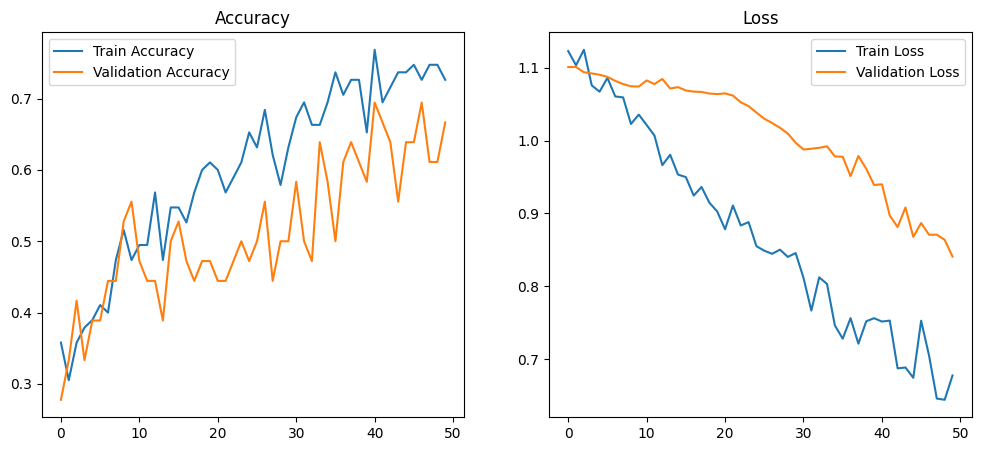

In [24]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


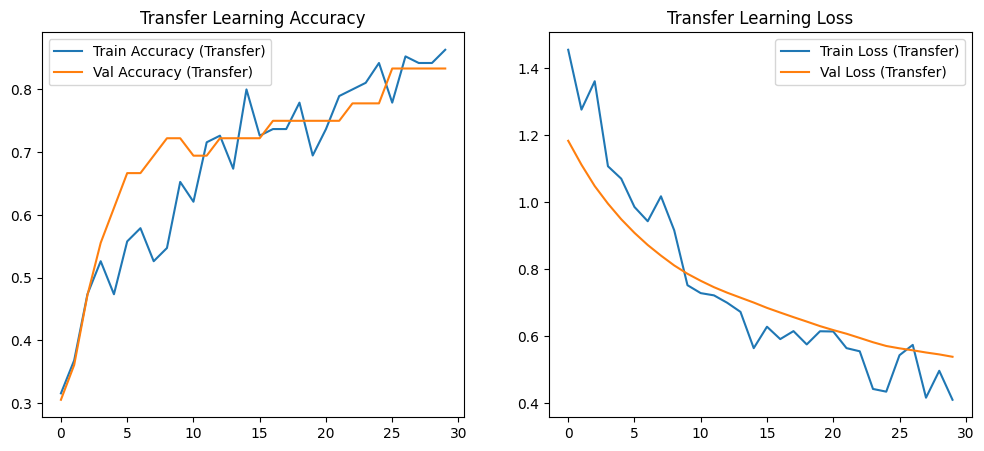

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_transfer.history['accuracy'], label='Train Accuracy (Transfer)')
plt.plot(history_transfer.history['val_accuracy'], label='Val Accuracy (Transfer)')
plt.legend()
plt.title('Transfer Learning Accuracy')

plt.subplot(1,2,2)
plt.plot(history_transfer.history['loss'], label='Train Loss (Transfer)')
plt.plot(history_transfer.history['val_loss'], label='Val Loss (Transfer)')
plt.legend()
plt.title('Transfer Learning Loss')

plt.show()


1️⃣ Store Metrics During Training
For Custom CNN (Before Transfer Learning)

In [32]:
train_acc_cnn = history.history['accuracy'][-1]
val_acc_cnn = history.history['val_accuracy'][-1]

test_loss_cnn, test_acc_cnn = model.evaluate(test_generator)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7368 - loss: 0.7235


For Transfer Learning (MobileNetV2)

In [33]:
train_acc_transfer = history_transfer.history['accuracy'][-1]
val_acc_transfer = history_transfer.history['val_accuracy'][-1]

test_loss_transfer, test_acc_transfer = model.evaluate(test_generator)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7368 - loss: 0.7235


In [34]:
import pandas as pd

comparison = pd.DataFrame({
    "Method": ["Custom CNN", "Transfer Learning (MobileNetV2)"],
    "Train Accuracy": [f"{train_acc_cnn*100:.2f}%", f"{train_acc_transfer*100:.2f}%"],
    "Validation Accuracy": [f"{val_acc_cnn*100:.2f}%", f"{val_acc_transfer*100:.2f}%"],
    "Test Accuracy": [f"{test_acc_cnn*100:.2f}%", f"{test_acc_transfer*100:.2f}%"],
    "Test Loss": [f"{test_loss_cnn:.4f}", f"{test_loss_transfer:.4f}"]
})

print(comparison)



                            Method Train Accuracy Validation Accuracy  \
0                       Custom CNN         72.63%              66.67%   
1  Transfer Learning (MobileNetV2)         86.32%              83.33%   

  Test Accuracy Test Loss  
0        73.68%    0.7235  
1        73.68%    0.7235  
